In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft 
import math as m

In [2]:
def wavenum(i, N) : return (i + N // 2) % N - N // 2

Text(0.5, 1.0, 'Filter with M=2.')

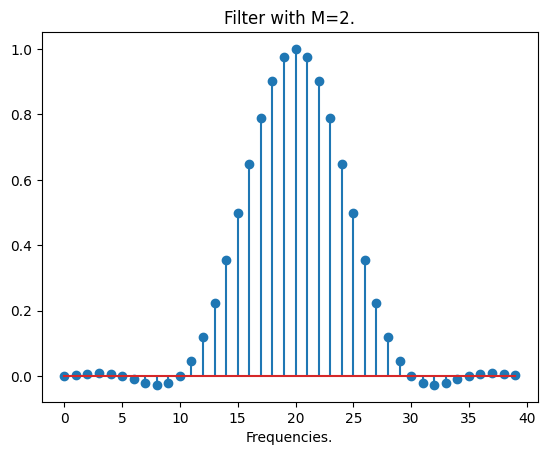

In [39]:
# Create filter.
filter_size = 40

M = 2
H = np.zeros(filter_size, dtype=complex)

for i in range(filter_size):
    k = wavenum(i, filter_size)
    a = 2 * np.pi / filter_size * k * M 
    
    #G_b, integral from -M to M of cos(t*pi/M) e^(-iwt)
    if (m.isclose(a, np.pi/M)):
        H[i] = M
    elif (m.isclose(a, -np.pi/M)):
        H[i] = M
    else:
        H[i] += -(2 * M**2 * a * np.sin(M * a))/(M**2 * a**2 - np.pi**2)

    # G_a, integral from -M to M of e^(-iwt)
    if a != 0:
        H[i] += 2 * np.sin(M * a) / a
    else:
        H[i] = 2 * M
        
        
H /= 2.0 * M
plt.stem(np.arange(filter_size),  np.fft.fftshift(H).real)
plt.xlabel("Frequencies.")
plt.title("Filter with M="+ str(M) + ".")

Text(0.5, 0, 'Time Domain')

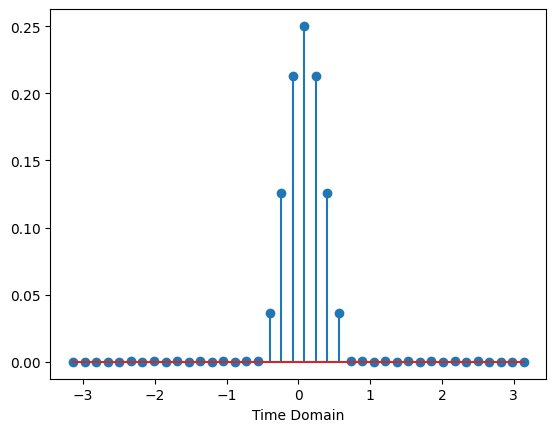

In [40]:
# Inverse Fourier Transform of the filter, fftshifted. TIME DOMAIN
h = np.fft.ifft(H)
plt.stem(np.linspace(-np.pi, np.pi, filter_size), np.fft.fftshift(h).real)
plt.xlabel("Time Domain")

Text(0.5, 0, 'Frequency domain')

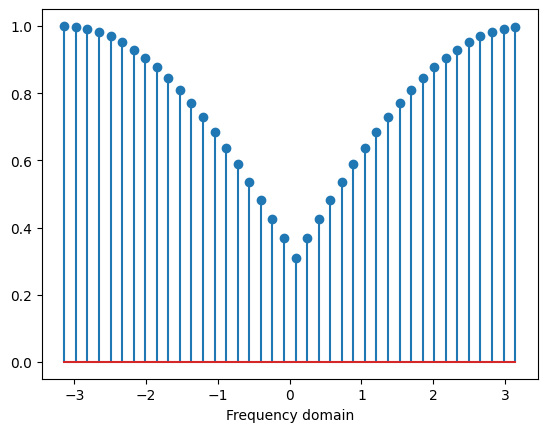

In [41]:
#Shift phase. Based on size of filter since it is that which we are shifting now.
SHIFT = 20.4
delta = SHIFT % 1
L = np.zeros(filter_size, dtype=complex)
for i in range(filter_size):
    L[i] = np.exp(-2j * np.pi * delta * wavenum(i,filter_size) /filter_size)
plt.stem(np.linspace(-np.pi, np.pi, filter_size), L.real)
plt.xlabel("Frequency domain")

(0.24398371729282095+6.178969538259614e-20j)
(0.2362321564777143-6.178969538259614e-20j)
(0.1638410494683913+6.178969538259614e-20j)
(0.06787608340563035-6.178969538259614e-20j)
(0.007012382195151218+6.178969538259614e-20j)
(-0.00040600578860616396-6.178969538259614e-20j)
(8.804624163841757e-05+6.178969538259614e-20j)
(-1.942295398724703e-05-6.178969538259614e-20j)
(-1.313636378447191e-06+6.178969538259614e-20j)
(8.637888729812193e-06-6.178969538259614e-20j)
(-1.1351882638473848e-05+6.178969538259614e-20j)
(1.2290499072451249e-05-6.178969538259614e-20j)
(-1.2514409010822362e-05+6.178969538259614e-20j)
(1.2463252472762198e-05-6.178969538259614e-20j)
(-1.2333152645704892e-05+6.178969538259614e-20j)
(1.2216965976086236e-05-6.178969538259614e-20j)
(-1.216167842650264e-05+6.178969538259614e-20j)
(1.2193837956160288e-05-6.178969538259614e-20j)
(-1.2331716040507738e-05+6.178969538259614e-20j)
(1.2591710426780374e-05-6.178969538259614e-20j)
(-1.299227798531842e-05+6.178969538259614e-20j)
(1.35

Text(0.5, 0, 'Time domain')

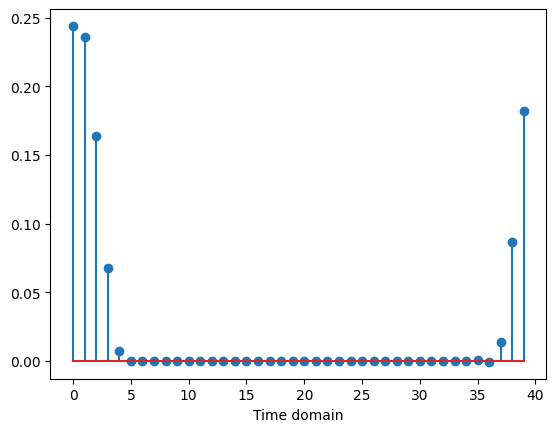

In [42]:
# Multiply filter by phase shift and do Inverse Fourier Transform.
z = np.fft.ifft(L * H)
for i in range(filter_size):
    print(z[i])
plt.stem(np.arange(filter_size),z.real)
plt.xlabel("Time domain")

<StemContainer object of 3 artists>

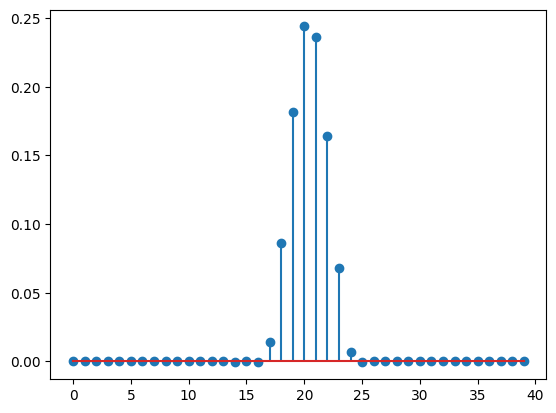

In [43]:
plt.stem(np.arange(filter_size), np.fft.fftshift(z).real)

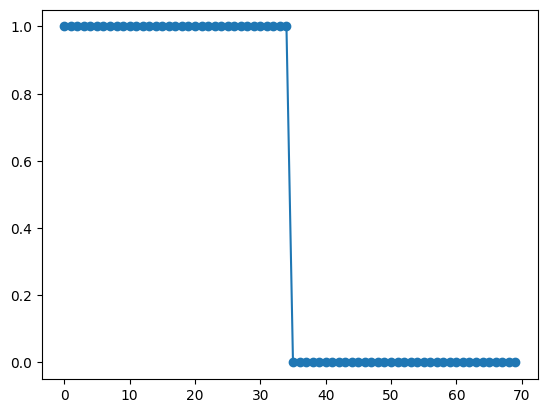

In [44]:
n = 70
x_o = np.arange(n)
xn = n * 0.5
x = x_o < xn
x = np.array(x)
plt.plot(x_o,x, marker ='o')

<StemContainer object of 3 artists>

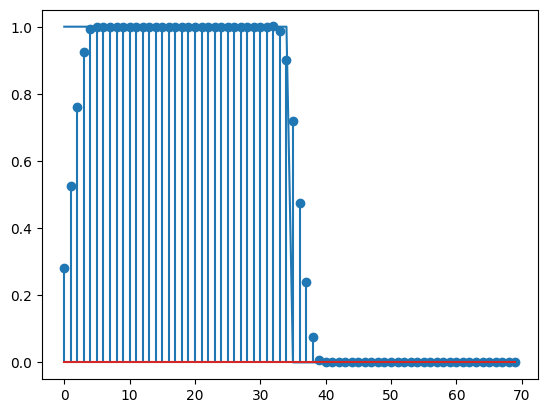

In [45]:
x_shifted_filter = np.zeros(n, dtype=complex)
x_shifted_filter = np.convolve(x,np.fft.fftshift(z), 'same')
plt.plot(x_o,x)
plt.stem(x_o,x_shifted_filter.real)

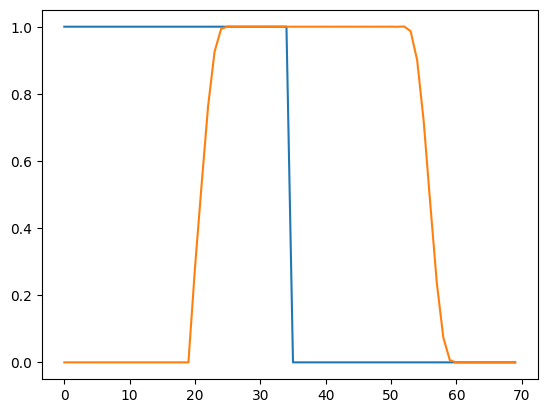

In [46]:
x_shifted = np.zeros(n, dtype=complex)
for i in range(n):
        new_index = (i + int(SHIFT)) % n
        x_shifted[new_index] = x_shifted_filter[i]
plt.plot(x_o,x)
plt.plot(x_o,x_shifted.real)